## Data Science Exploration

This script will do an EDA of the Top Hits on Spotify from 2000-2019 
- https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data 
- This dataset contains audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and it's qualities.

In [242]:
# Import required libaries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
# Read in the data 
spotifyData = pd.read_csv('spotify.csv')

In [244]:
# Explore the data 
print(spotifyData.shape) # Size of the data set 
print(spotifyData.sample()) # Print a sample of the data 

(2000, 18)
     artist                                               song  duration_ms  \
42  Bow Wow  Bounce With Me (feat. Xscape) - Edited Album V...       175893   

    explicit  year  popularity  danceability  energy  key  loudness  mode  \
42     False  2000          36         0.852    0.75    8    -5.153     1   

    speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
42        0.168         0.434               0.0     0.265    0.934  72.016   

                genre  
42  hip hop, pop, R&B  


In [245]:
print(spotifyData.describe()) # Distribution of the numeric columns 

         duration_ms        year   popularity  danceability       energy  \
count    2000.000000  2000.00000  2000.000000   2000.000000  2000.000000   
mean   228748.124500  2009.49400    59.872500      0.667438     0.720366   
std     39136.569008     5.85996    21.335577      0.140416     0.152745   
min    113000.000000  1998.00000     0.000000      0.129000     0.054900   
25%    203580.000000  2004.00000    56.000000      0.581000     0.622000   
50%    223279.500000  2010.00000    65.500000      0.676000     0.736000   
75%    248133.000000  2015.00000    73.000000      0.764000     0.839000   
max    484146.000000  2020.00000    89.000000      0.975000     0.999000   

               key     loudness         mode  speechiness  acousticness  \
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean      5.378000    -5.512434     0.553500     0.103568      0.128955   
std       3.615059     1.933482     0.497254     0.096159      0.173346   
min       0.000

## SONGS PER YEAR

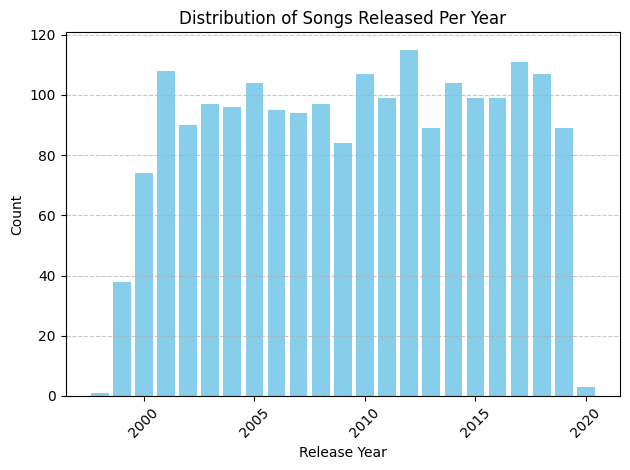

In [246]:
# How many songs were released per year? 

# Group the data by year and get a count for each year 
year_counts = spotifyData['year'].value_counts().sort_index()

# Create a plot 
plt.figure() 
plt.bar(year_counts.index, year_counts.values, color = 'skyblue')
plt.title('Distribution of Songs Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

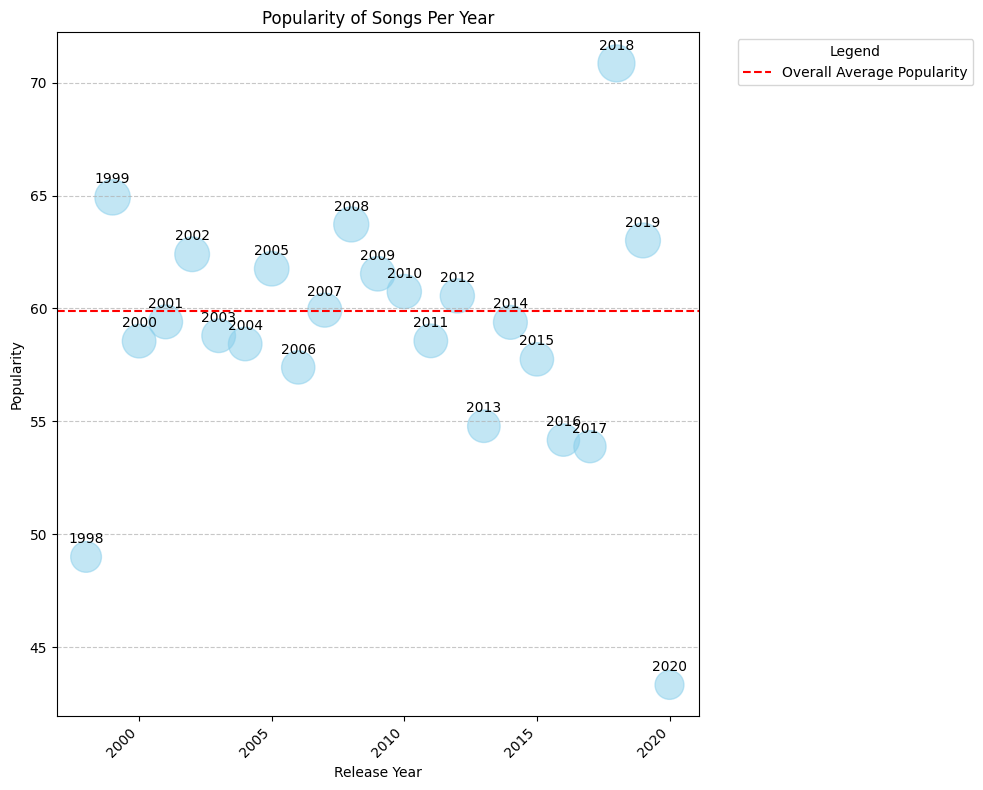

In [247]:
# Average popularity of songs per year 

# Calculate the average popularity of all songs across the years 
year_avg_popularity = spotifyData.groupby('year')['popularity'].mean()

# Calculate the average popularity of all songs
overall_avg_popularity = spotifyData['popularity'].mean()

# Plot the average popularity for each artist using a scatter plot with bubble sizes
plt.figure(figsize=(10, 8))
plt.scatter(year_avg_popularity.index, year_avg_popularity.values, s=year_avg_popularity.values*10, color='skyblue', alpha=0.5)
[plt.annotate(f'{year}', (year, popularity), textcoords="offset points", xytext=(0,10), ha='center') for year, popularity in zip(year_avg_popularity.index, year_avg_popularity.values)]
plt.title('Popularity of Songs Per Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=overall_avg_popularity, color='red', linestyle='--', label='Overall Average Popularity') 
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## SONGS PER GENRE

In [248]:
# How many songs were released per genre? 

# Group the data by genre and get a count for each genre 
genre_counts = spotifyData['genre'].value_counts().sort_index()

# There are too many genre categories, we want to consolidate them into 5-10 main categories to make a more meaningful analysis 
# We will get the first genre that occurs in each row
spotifyData['genre'] = spotifyData['genre'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else None)

# Get an updated count 
updated_genre_counts = spotifyData['genre'].value_counts().sort_index()

# There are still genres with a low count, consildate these into an 'Other' genre and add 'Set()' genre to other as well 
genres_to_replace = genre_counts[genre_counts < 10].index
spotifyData.loc[spotifyData['genre'] == 'set()', 'genre'] = 'Other'
spotifyData.loc[spotifyData['genre'].isin(genres_to_replace), 'genre'] = 'Other'

# Get an updated count of consolidated genres  
consolidated_genre_counts = spotifyData['genre'].value_counts().sort_index().sort_values(ascending=False) # sort the counts in descending order 
print(consolidated_genre_counts)

genre
pop                  936
hip hop              776
rock                 162
Dance/Electronic      41
Other                 32
latin                 15
R&B                   13
country               11
World/Traditional     10
Folk/Acoustic          4
Name: count, dtype: int64


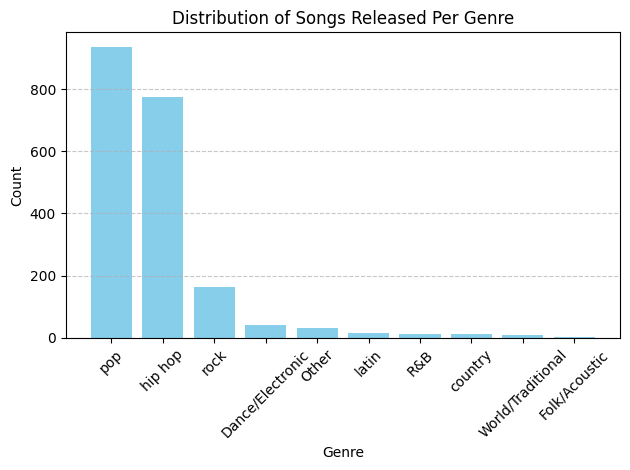

In [249]:
# How many songs were released per genre? 

# Create a plot 
plt.figure() 
plt.bar(consolidated_genre_counts.index, consolidated_genre_counts.values, color = 'skyblue')
plt.title('Distribution of Songs Released Per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## TOP ARTISTS 

In [250]:
# Group the data by artist and get a count for each year 
artist_counts = spotifyData['artist'].value_counts().sort_index().sort_values(ascending=False)

# Get the top 10 artists 
top_artists = artist_counts.head(10)
spotifyData_filtered = spotifyData[spotifyData['artist'].isin(top_artists.index)]

# Count the occurrences of each genre in the filtered dataset
consolidated_artist_counts = spotifyData_filtered['artist'].value_counts().sort_index().sort_values(ascending=False)


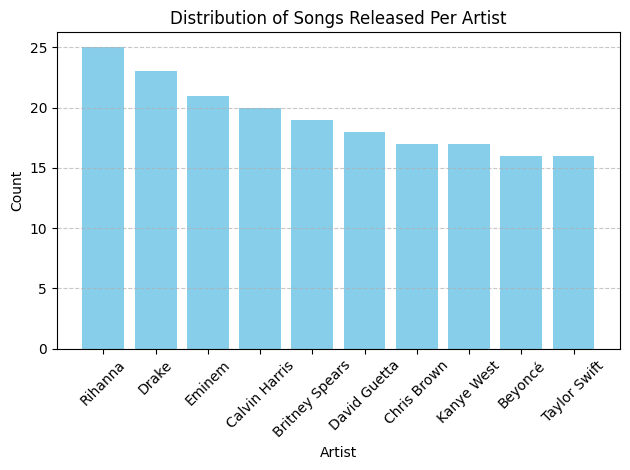

In [251]:
# Plot the artist counts
plt.figure() 
plt.bar(consolidated_artist_counts.index, consolidated_artist_counts.values, color='skyblue')
plt.title('Distribution of Songs Released Per Artist')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

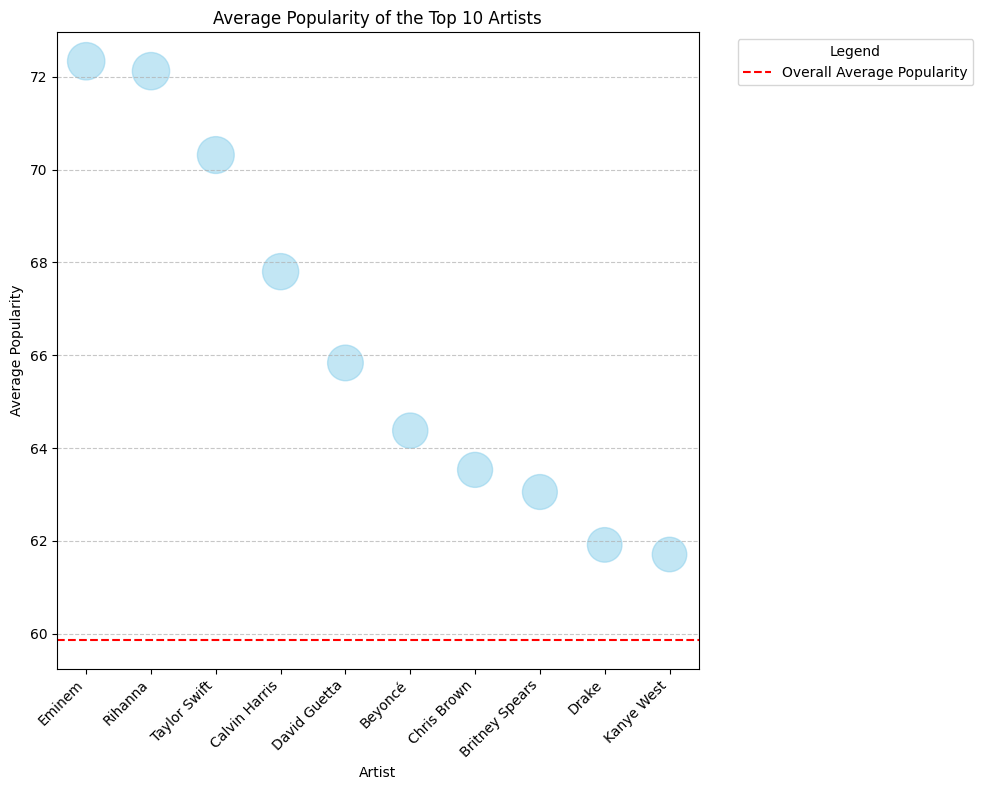

In [252]:
# Calculate the average popularity of all songs for each artist
artist_avg_popularity = spotifyData_filtered.groupby('artist')['popularity'].mean().sort_values(ascending=False)

# Calculate the average popularity of all songs
overall_avg_popularity = spotifyData['popularity'].mean()

# Plot the average popularity for each artist using a scatter plot with bubble sizes
plt.figure(figsize=(10, 8))
plt.scatter(artist_avg_popularity.index, artist_avg_popularity.values, s=artist_avg_popularity.values*10, color='skyblue', alpha=0.5)
plt.title('Average Popularity of the Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=overall_avg_popularity, color='red', linestyle='--', label='Overall Average Popularity') 
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# INVESTIGATION: Why was 2018 so popular, why was 2020 not popular? 

In [253]:
# Filter the data for songs released in 2018 and 2020
songs_2018 = spotifyData[spotifyData['year'] == 2018]
songs_2020 = spotifyData[spotifyData['year'] == 2020]

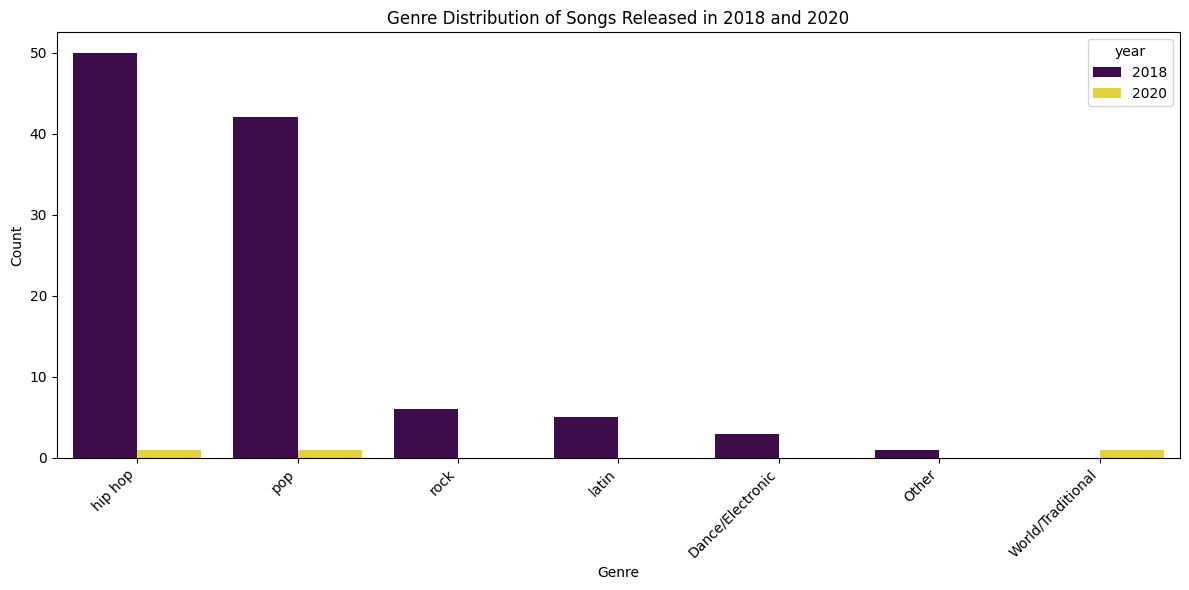

In [254]:
# Compare Genre Distribution

# Concatenate the dataframes
songs_concatenated_2018_2020 = pd.concat([songs_2018.assign(year=2018), songs_2020.assign(year=2020)])

# Plot the genre distribution for songs released in 2018 and 2020
plt.figure(figsize=(12, 6))
sns.countplot(data=songs_concatenated_2018_2020, x='genre', hue='year', order=songs_concatenated_2018_2020['genre'].value_counts().index, palette='viridis')
plt.title('Genre Distribution of Songs Released in 2018 and 2020')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [255]:
# Get the count of the dataframes 
count_2018 = songs_2018.shape[0]
count_2020 = songs_2020.shape[0]

print("Count of songs released in 2018:", count_2018)
print("Count of songs released in 2020:", count_2020)

Count of songs released in 2018: 107
Count of songs released in 2020: 3


#### OUTCOME 
The reason 2020 was so not popular is because there are only three songs in teh sample size, so we cannot make any further useful analysis on 2020 data 

# INVESTIGATION: Why was 2018 so popular, why was 2017 not popular? 

In [256]:
# Filter the data for songs released in 2017 and 2018 
songs_2017 = spotifyData[spotifyData['year'] == 2017]
songs_2018 = spotifyData[spotifyData['year'] == 2018]

# Get the count of the dataframes
count_2017 = songs_2017.shape[0]
count_2018 = songs_2018.shape[0]

Observations: 
- Count of songs released in 2017: 111
- Count of songs released in 2018: 107

We can compare these two years to work out if there are any obvious patterns as to why the songs in 2018 were much more popular to the songs in 2017

C:\Users\harrison.bailye\AppData\Local\Temp\ipykernel_36524\3019676873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_2017['genre'] = songs_2017['genre'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else None)
C:\Users\harrison.bailye\AppData\Local\Temp\ipykernel_36524\3019676873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_2018['genre'] = songs_2018['genre'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else None)


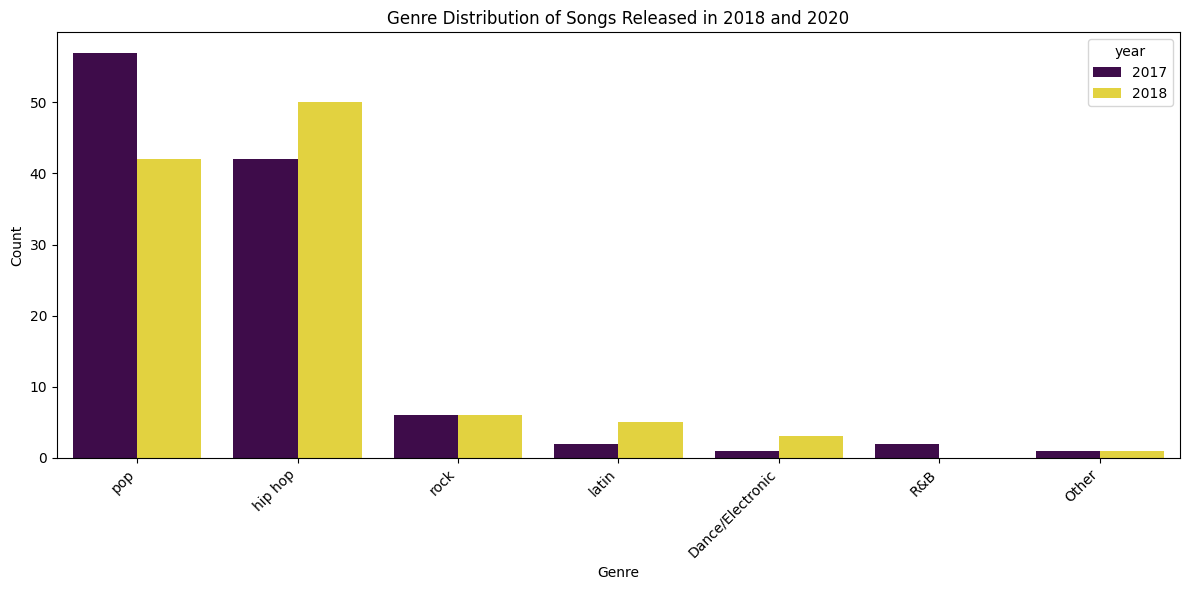

In [257]:
# Compare Genre Distribution

# Extract just the first genre 
songs_2017['genre'] = songs_2017['genre'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else None)
songs_2018['genre'] = songs_2018['genre'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else None)

# Concatenate the dataframes
songs_concatenated_2017_2018 = pd.concat([songs_2017.assign(year=2017), songs_2018.assign(year=2018)])

# Plot the genre distribution for songs released in 2018 and 2020
plt.figure(figsize=(12, 6))
sns.countplot(data=songs_concatenated_2017_2018, x='genre', hue='year', order=songs_concatenated_2017_2018['genre'].value_counts().index, palette='viridis')
plt.title('Genre Distribution of Songs Released in 2018 and 2020')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Observations: 
- 2017 had a lot of Pop, R&B and Easy Listening 
- 2018 had a lot more Hip Hop, Latin and Dance/Electronic

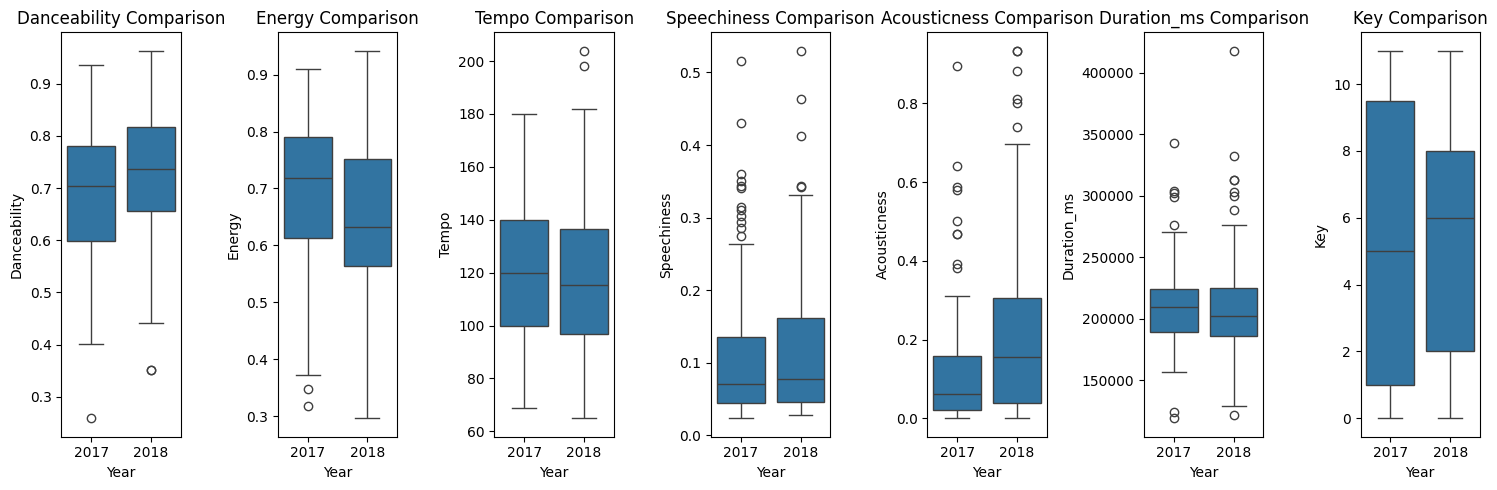

In [258]:
# Define the song features to compare
features = ['danceability', 'energy', 'tempo', 'speechiness',  'acousticness', 'duration_ms', 'key']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Plot boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x='year', y=feature, data=pd.concat([songs_2017.assign(year=2017), songs_2018.assign(year=2018)]), ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} Comparison')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'{feature.capitalize()}')

plt.tight_layout()
plt.show()

Observations: 
- 2017 had a lower danceability, speechiness and acousticness but had a higher energy and tempo 
- 2018 had a higher danceability, speechiness and acousticness but had a lower energy and tempo 

#### TOP 10 Artists with Most Songs

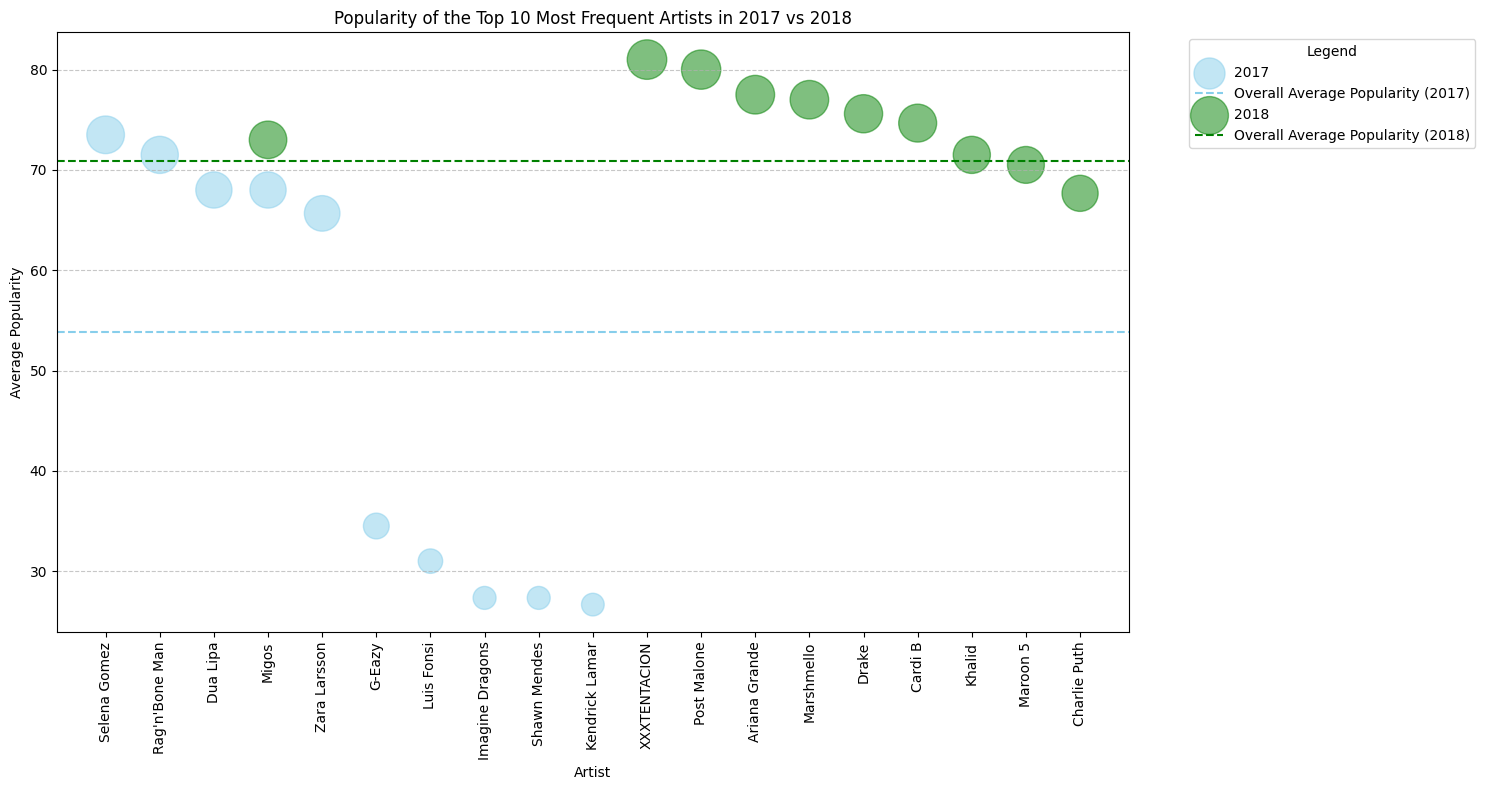

In [259]:
# Top 10 artists with most songs 
top_artists_2017 = songs_2017['artist'].value_counts().sort_index().sort_values(ascending=False).head(10)
top_artists_2018 = songs_2018['artist'].value_counts().sort_index().sort_values(ascending=False).head(10)

# Filter the data by the top 10 artists 
spotifyData_filtered_2017 = songs_2017[songs_2017['artist'].isin(top_artists_2017.index)]
spotifyData_filtered_2018 = songs_2018[songs_2018['artist'].isin(top_artists_2018.index)]

# Calculate average song popularity for each of the top 10 artists 
artist_avg_popularity_2017 = spotifyData_filtered_2017.groupby('artist')['popularity'].mean().sort_values(ascending=False)
artist_avg_popularity_2018 = spotifyData_filtered_2018.groupby('artist')['popularity'].mean().sort_values(ascending=False)

# Calculate the average popularity of all songs
overall_avg_popularity_2017 = songs_2017['popularity'].mean()
overall_avg_popularity_2018 = songs_2018['popularity'].mean()

# Create a figure with subplots
plt.figure(figsize=(15, 8))

# Plot the scatter plot for 2017
plt.scatter(artist_avg_popularity_2017.index, artist_avg_popularity_2017.values, s=artist_avg_popularity_2017.values*10, color='skyblue', alpha=0.5, label='2017')
plt.axhline(y=overall_avg_popularity_2017, color='skyblue', linestyle='--', label='Overall Average Popularity (2017)')

# Plot the scatter plot for 2018
plt.scatter(artist_avg_popularity_2018.index, artist_avg_popularity_2018.values, s=artist_avg_popularity_2018.values*10, color='green', alpha=0.5, label='2018')
plt.axhline(y=overall_avg_popularity_2018, color='green', linestyle='--', label='Overall Average Popularity (2018)')

# Set titles and labels
plt.title('Popularity of the Top 10 Most Frequent Artists in 2017 vs 2018')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation = 90)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Observations: 
- 2017 average popularity of top 10 artists is 55, whereas for 2018 it is 71 

#### TOP 10 Most Popular Artists

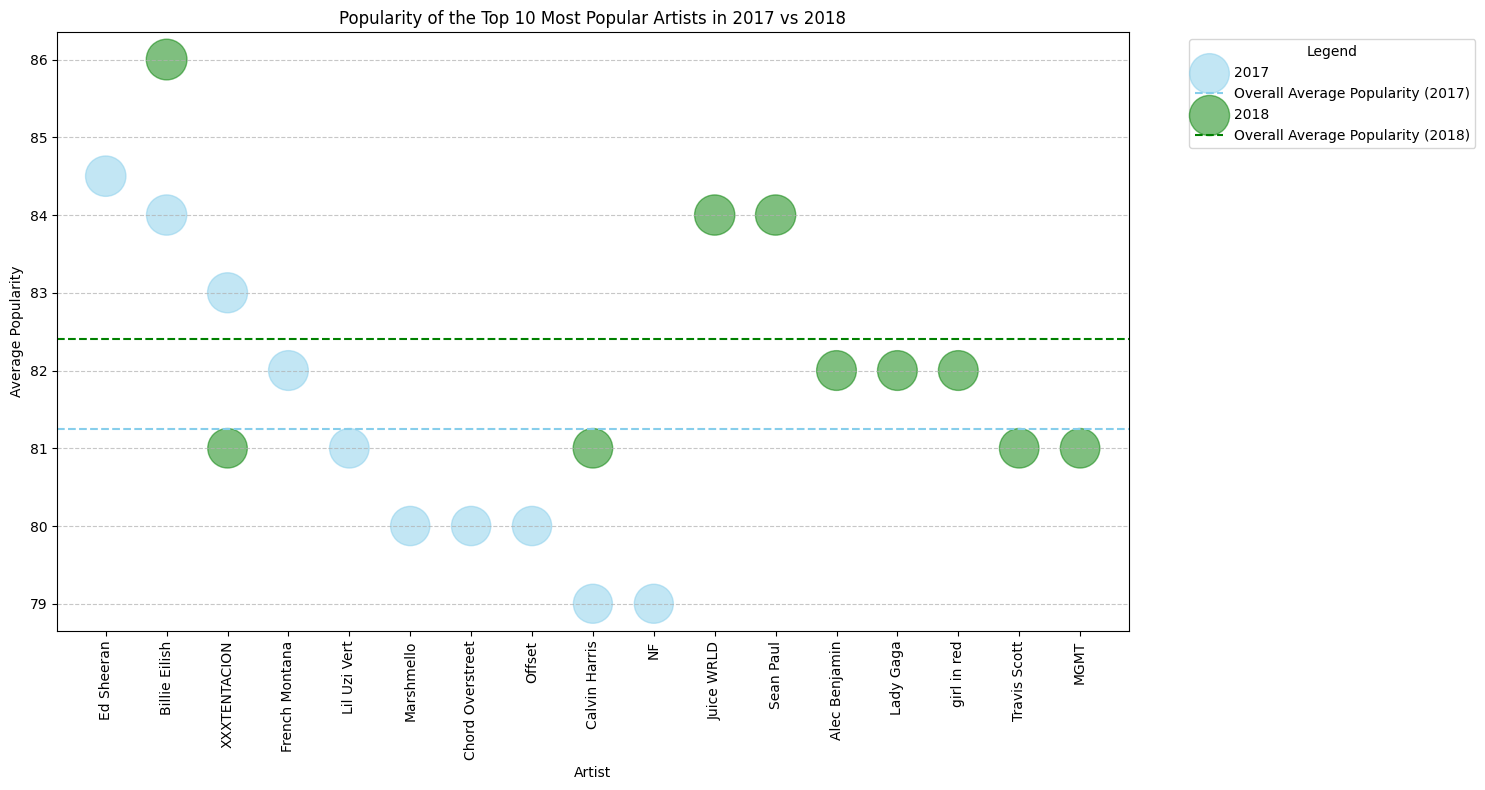

In [260]:
# Get the 2017 and 2018 data 
songs_2017_2 = spotifyData[spotifyData['year'] == 2017]
songs_2018_2 = spotifyData[spotifyData['year'] == 2018]

# Calculate the average popularity of each artist
artist_avg_popularity_2017 = songs_2017_2.groupby('artist')['popularity'].mean().sort_values(ascending=False)
artist_avg_popularity_2018 = songs_2018_2.groupby('artist')['popularity'].mean().sort_values(ascending=False)

# Select the top 10 artists based on average popularity
top_artists_2017 = artist_avg_popularity_2017.head(10)
top_artists_2018 = artist_avg_popularity_2018.head(10)

# Calculate the average popularity of all songs
overall_avg_popularity_2017 = top_artists_2017.mean()
overall_avg_popularity_2018 = top_artists_2018.mean()

# Create a figure with subplots
plt.figure(figsize=(15, 8))

# Plot the scatter plot for 2017
plt.scatter(top_artists_2017.index, top_artists_2017.values, s=top_artists_2017.values*10, color='skyblue', alpha=0.5, label='2017')
plt.axhline(y=overall_avg_popularity_2017, color='skyblue', linestyle='--', label='Overall Average Popularity (2017)')

# Plot the scatter plot for 2018
plt.scatter(top_artists_2018.index, top_artists_2018.values, s=top_artists_2018.values*10, color='green', alpha=0.5, label='2018')
plt.axhline(y=overall_avg_popularity_2018, color='green', linestyle='--', label='Overall Average Popularity (2018)')

# Set titles and labels
plt.title('Popularity of the Top 10 Most Popular Artists in 2017 vs 2018')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation = 90)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### TOP 10 Least Popular Artists

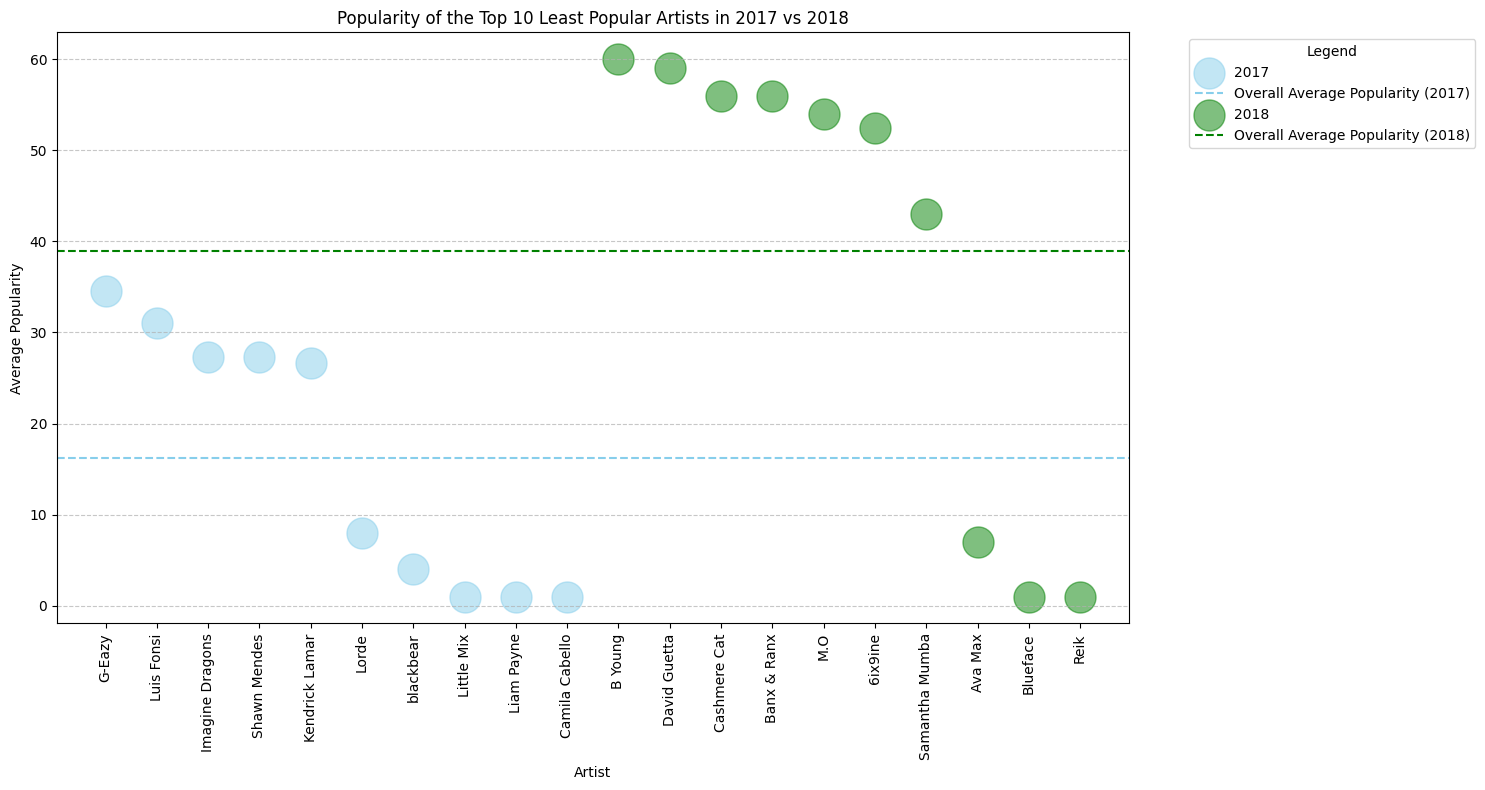

In [273]:
# Filter out artists with a popularity of 0
artist_avg_popularity_2017_filtered = artist_avg_popularity_2017[artist_avg_popularity_2017 != 0]
artist_avg_popularity_2018_filtered = artist_avg_popularity_2018[artist_avg_popularity_2018 != 0]

# Select the bottom 10 artists based on average popularity
bottom_artists_2017 = artist_avg_popularity_2017_filtered.tail(10)
bottom_artists_2018 = artist_avg_popularity_2018_filtered.tail(10)

# Calculate the average popularity of all songs
overall_avg_popularity_2017 = bottom_artists_2017.mean()
overall_avg_popularity_2018 = bottom_artists_2018.mean()

# Create a figure with subplots
plt.figure(figsize=(15, 8))

# Plot the scatter plot for 2017
plt.scatter(bottom_artists_2017.index, bottom_artists_2017.values, s = 500, color='skyblue', alpha=0.5, label='2017')
plt.axhline(y=overall_avg_popularity_2017, color='skyblue', linestyle='--', label='Overall Average Popularity (2017)')

# Plot the scatter plot for 2018
plt.scatter(bottom_artists_2018.index, bottom_artists_2018.values, s=500, color='green', alpha=0.5, label='2018')
plt.axhline(y=overall_avg_popularity_2018, color='green', linestyle='--', label='Overall Average Popularity (2018)')

# Set titles and labels
plt.title('Popularity of the Top 10 Least Popular Artists in 2017 vs 2018')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation = 90)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Investigate All '0' Popularity Songs in 2017

In [279]:
# Print out songs will 0 popularity 
artist_avg_popularity_2017_zero = artist_avg_popularity_2017[artist_avg_popularity_2017 == 0]
artist_avg_popularity_2018_zero = artist_avg_popularity_2018[artist_avg_popularity_2018 == 0]
print(artist_avg_popularity_2017_zero.count())
print(artist_avg_popularity_2018_zero.count())

12
1


Observations:
- 2017 has twelves songs with a 0 popularity rating compared to 1 in 2018, which is why 2017 has a much lower than 2018

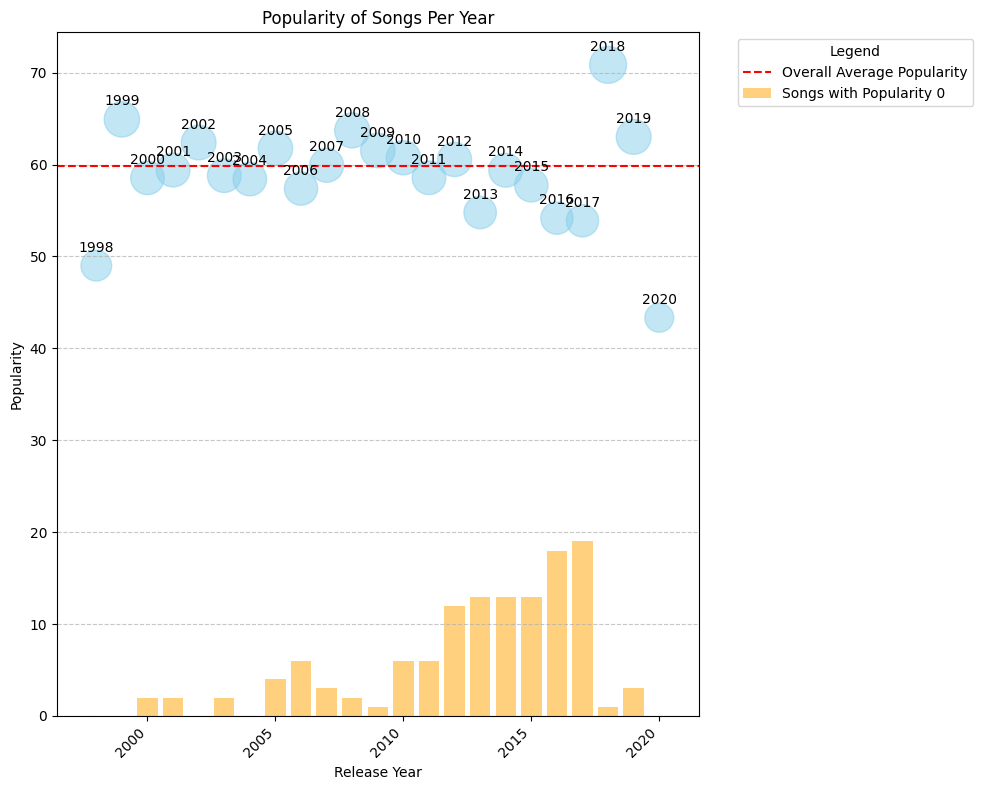

In [281]:
# Average popularity of songs per year
year_avg_popularity = spotifyData.groupby('year')['popularity'].mean()

# Calculate the average popularity of all songs
overall_avg_popularity = spotifyData['popularity'].mean()

# Dictionary to store counts of songs with popularity '0' for each year
zero_popularity_counts = {}

# Iterate over each year
for year in spotifyData['year'].unique():
    year_data = spotifyData[spotifyData['year'] == year]
    zero_popularity_count = year_data[year_data['popularity'] == 0].shape[0]
    zero_popularity_counts[year] = zero_popularity_count

# Create a plot
plt.figure(figsize=(10, 8))

# Plot the average popularity for each year
plt.scatter(year_avg_popularity.index, year_avg_popularity.values, s=year_avg_popularity.values*10, color='skyblue', alpha=0.5)
[plt.annotate(f'{year}', (year, popularity), textcoords="offset points", xytext=(0,10), ha='center') for year, popularity in zip(year_avg_popularity.index, year_avg_popularity.values)]

# Overlay the count of songs with popularity '0' for each year
plt.bar(zero_popularity_counts.keys(), zero_popularity_counts.values(), color='orange', alpha=0.5, label='Songs with Popularity 0')

# Plot the overall average popularity
plt.axhline(y=overall_avg_popularity, color='red', linestyle='--', label='Overall Average Popularity')

# Set titles and labels
plt.title('Popularity of Songs Per Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Conclusion
- 2017 has a lower popularity compared to 2018 because of all the zero values

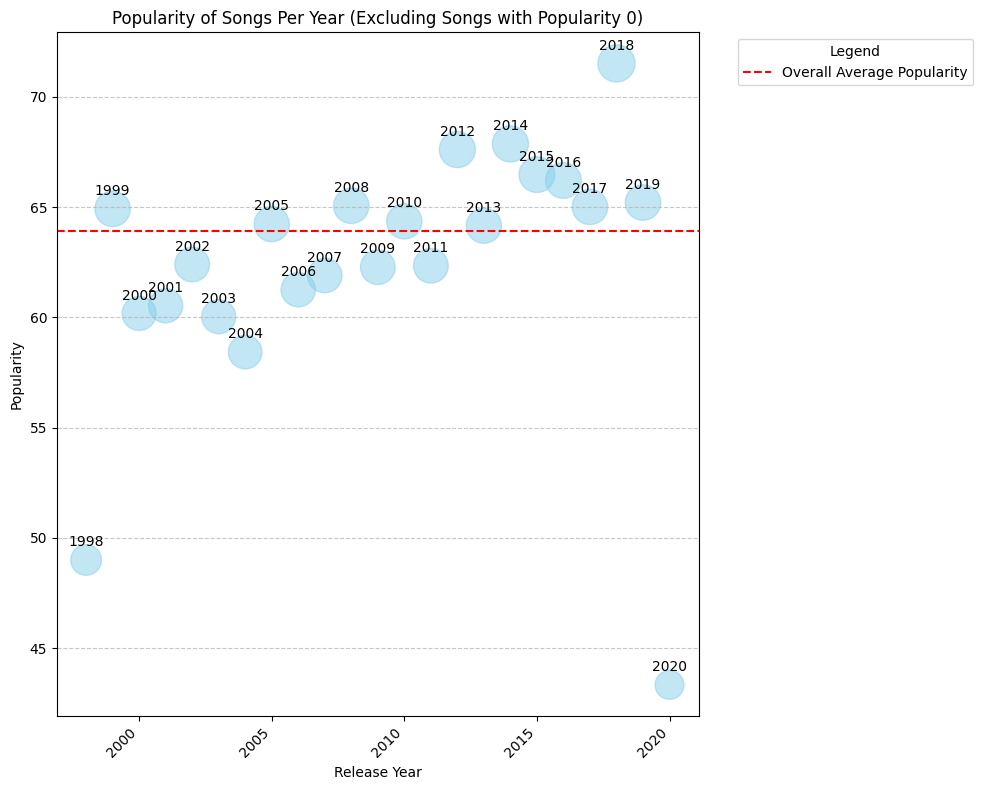

In [282]:
# Remove '0' from the data and remove years with under 10 data points (songs released) and plot the popularity of songs across the years 

# Remove rows with popularity equal to 0
spotifyData_filtered = spotifyData[spotifyData['popularity'] != 0]

# Calculate the count of songs per year
year_song_counts = spotifyData_filtered['year'].value_counts()

# Filter out years with less than 10 songs
years_to_keep = year_song_counts[year_song_counts >= 10].index
spotifyData_filtered = spotifyData_filtered[spotifyData_filtered['year'].isin(years_to_keep)]

# Calculate the average popularity of songs per year
year_avg_popularity = spotifyData_filtered.groupby('year')['popularity'].mean()

# Calculate the overall average popularity
overall_avg_popularity = spotifyData_filtered['popularity'].mean()

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(year_avg_popularity.index, year_avg_popularity.values, s=year_avg_popularity.values*10, color='skyblue', alpha=0.5)
[plt.annotate(f'{year}', (year, popularity), textcoords="offset points", xytext=(0,10), ha='center') for year, popularity in zip(year_avg_popularity.index, year_avg_popularity.values)]
plt.title('Popularity of Songs Per Year (Excluding Songs with Popularity 0)')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=overall_avg_popularity, color='red', linestyle='--', label='Overall Average Popularity') 
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()